Subham Dash

1032201719

Batch: D1 

DNN MidTerm Practical

13-03-2024

Implement CNN for Medical Image Classification


12. Develop a Python script to implement a CNN for medical image classification using the
Chest X-Ray Images dataset. Design a CNN architecture to classify chest X-ray images
into normal and pneumonia categories. Evaluate the model&#39;s accuracy and discuss the
implications for medical diagnostics.
Dataset: Chest X-Ray Images from Keras

## What is CNN (Convolutional Neural Network) ?

CNN stands for Convolutional Neural Network which is a specializaed neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

## A. About Dataset

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia




## B. DATA UNDERSTANDING

### Installation the Libraries

In [1]:
!pip install opendatasets --upgrade --quiet

### Import Libraries


In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 4.1 MB/s eta 0:01:32
   ---------------------------------------- 0.5/377.0 MB 4.7 MB/s eta 0:01:20
   ---------------------------------------- 0.7/377.0 MB 5.3 MB/s eta 0:01:12
   ---------------------------------------- 1.0/377.0 MB 5.2 MB/s eta 0:01:13
   ---------------------------------------- 1.3/377.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 1.5/377.0 MB 5.4 MB/s eta 0:01:10
   ---------------------------------------- 1.8/377.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 2.1/377.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.4/377.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 2.7/377.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.9/377.0 MB 5.5 MB/s eta 0:01:08
   ---------------------------------------- 3.2/377.0 MB 5.6 MB/s eta 0

In [2]:
!pip install imgaug

   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 10.2/948.0 kB ? eta -:--:--
   -- ------------------------------------ 61.4/948.0 kB 656.4 kB/s eta 0:00:02
   ----------- ---------------------------- 276.5/948.0 kB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/948.0 kB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 747.5/948.0 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------  942.1/948.0 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB 5.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 5.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 5.3 MB/s eta 0:00:01
   ------

In [3]:
# Import libraries
import os
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
import opendatasets as od

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import random
from pathlib import Path #to be able to use functions using path


# Data science tools
import pandas as pd # data processing
import numpy as np # linear algebra

# Tensorflow for GPU
import tensorflow as tf
from tensorflow.compat.v1 import Session, ConfigProto, set_random_seed
from tensorflow.python.client import device_lib

# Keras library for Modeling
import keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3
from keras.constraints import max_norm
from keras import backend as K

# OpenCV
import cv2

# Resize images
from skimage.io import imread
from skimage.transform import resize

# Scikit-learn library
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Visualizations
from PIL import Image
import imgaug as aug
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import matplotlib.image as mimg # images
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Data Loading

In [5]:
# Directories for the training, validation, and test splits
train_dir = "C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train"
val_dir = "C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val"
test_dir = "C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test"

#### Data Loading for Train Dataset

In [6]:
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [14]:
train_normal_dir = Path(train_dir + "/NORMAL") #to set the path to the normals in train set
train_pneumonia_dir = Path(train_dir + "/PNEUMONIA") #to set the path to the pneumonias in train set

#### Data Loading for Validation Dataset

In [9]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

In [15]:
valid_normal_dir = Path(val_dir + "/NORMAL") #to set the path to the normals in validation set
valid_pneumonia_dir = Path(val_dir + "/PNEUMONIA") #to set the path to the pneumonias in validation set

#### Data Loading for Test Dataset

In [11]:
os.listdir(test_dir)

['NORMAL', 'PNEUMONIA']

In [16]:
test_normal_dir = Path(test_dir + "/NORMAL") #to set the path to the normals in test set
test_pneumonia_dir = Path(test_dir +"/PNEUMONIA") #to set the path to the pneumonias in test set

### Labeling

#### Setting the dataset for training

In [17]:
train_normal= train_normal_dir.glob("*.jpeg") #to take the normal images from train set 
train_pneumonia=train_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the train set
train_set=[]#to add all the train data into one list, we created a blank list

In [18]:
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) #we add 1 with pneumonia images as label

In [19]:
print(train_set[:15]) #to check what our list look like

[(WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0115-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0117-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0119-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0122-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0125-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0127-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0128-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0129-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/train/NORMAL/IM-0131-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/

In [20]:
train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features

In [21]:
train_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0


In [22]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1


#### Setting the dataset for valdiation

In [23]:
valid_normal= valid_normal_dir.glob("*.jpeg") #to take the normal images from validation set 
valid_pneumonia=valid_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the validation set
valid_set=[] #to add all the validation data into one list, we created a blank list

In [24]:
for img in valid_normal: #to add every image of normals in validationset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in validationset to the list
  valid_set.append((img, 1)) #we add 1 with pneumonia images as label


In [25]:
print(valid_set[:15]) #to check what our list look like

[(WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/val/PNEUMONIA/person1946_b

In [26]:
valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0


In [27]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1


#### Setting the dataset for test

In [28]:
test_normal= test_normal_dir.glob("*.jpeg") #to take the normal images from test set 
test_pneumonia=test_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the test set
test_set=[]#to add all the test data into one list, we created a blank list

In [29]:
for img in test_normal: #to add every image of normals in test set to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in test set to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label


In [30]:
print(test_set[:15]) #to check what our list look like

[(WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0001-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0003-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0005-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0006-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0007-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0009-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0010-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH/Downloads/archive (2)/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg'), 0), (WindowsPath('C:/Users/SHUBHAM DASH

In [31]:
test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0


In [32]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

,image,label
0,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
1,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
2,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,0
3,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1
4,C:\Users\SHUBHAM DASH\Downloads\archive (2)\ch...,1


### Data Visualization

In [33]:
# Normal Image
train_normal_count= train_set.loc[train_set["label"]==0]["image"].count()
print("Total number of normal images:", train_normal_count)

Total number of normal images: 1341


In [34]:
# Pneumonia Image
train_pneumonia_count= train_set.loc[train_set["label"]==1]["image"].count()
print("Total number of pneumonia images:", train_pneumonia_count)

Total number of pneumonia images: 3875


#### Normal / Pneumonia Image Visualization for Train Dataset

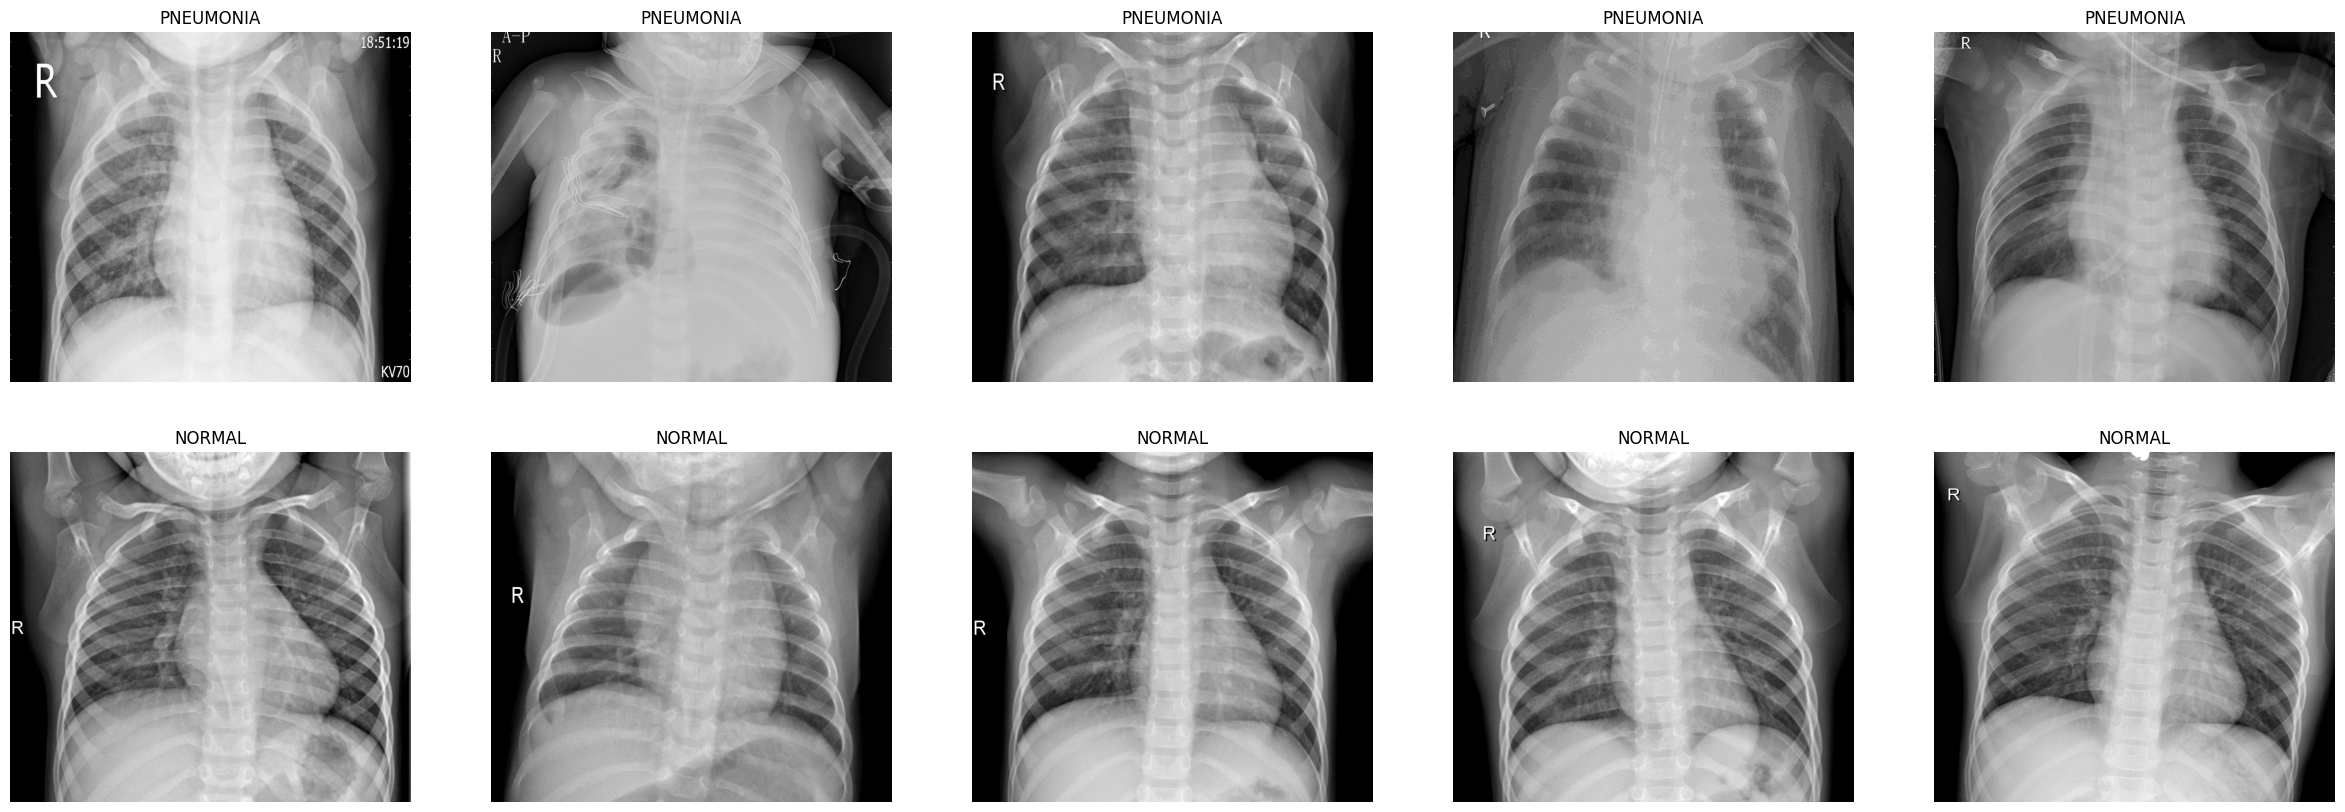

In [35]:
# Get few samples for both the classes
pneumonia_samples = (train_set[train_set["label"] == 1]["image"].iloc[:5]).tolist()
normal_samples = (train_set[train_set["label"] == 0]["image"].iloc[:5]).tolist()

# Concate the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize = (30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i % 5].set_title("PNEUMONIA")
    else:
        ax[i//5, i % 5].set_title("NORMAL")
    ax[i//5, i % 5].axis('off')
    ax[i//5, i % 5].set_aspect('auto')
plt.show()

#### Plotting the Data Distribution

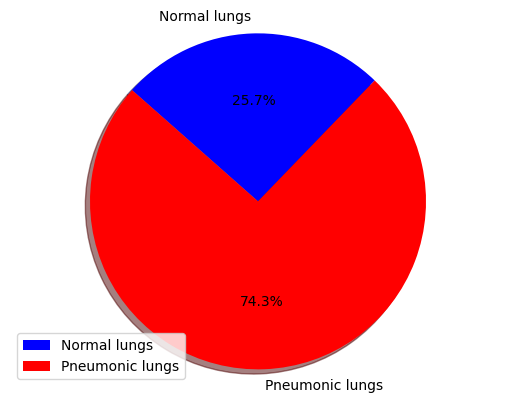

In [36]:
fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal lungs","Pneumonic lungs"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Case Distribution')

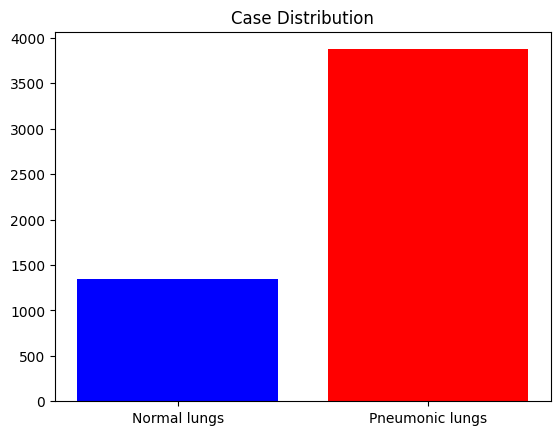

In [37]:
fig2, ax2=plt.subplots()
ax2.bar(height=sizes, x=["Normal lungs", "Pneumonic lungs"], color=["blue", "red"])
plt.title("Case Distribution")

According to this result, we have imbalanced image dataset. We will increase the "Normal" image dataset using Data Augmentation to correct this imbalance.

### Data Preparation

#### Data Distribution

In [41]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150


def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [42]:
train = get_training_data(train_dir)
test = get_training_data(test_dir)
val = get_training_data(val_dir)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5216, 2) + inhomogeneous part.

In [43]:
# initialize multiple lists
X_train, X_val, X_test = ([], ) * 3
y_train, y_val, y_test = ([], ) * 3

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

NameError: name 'train' is not defined

We perform a grayscale normalization to reduce the effect of illumination's differences. Moreover the CNN converges faster on [0..1] data than on [0..255].

#### Data Normalization

In [ ]:
X_train = np.array(X_train) /255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

#### Reshaping the data for deep learning model

In [ ]:
X_train = X_train.reshape (-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

## C. DATA AUGMENTATION

To avoid the overfitting problem, we need to artificially expand our dataset. We can further enlarge your existing dataset. The idea is to manipulate the training data with small transformations to reproduce the variations. Approaches that modify the training data to change the sequence representation while keeping the label the same are known as data augmentation techniques. Some popular magnifications people use are grayscales, horizontal flips, vertical flips, random crops, dithering, offsets, rotations, and much more. By applying just a few of these transformations to our training data, we can easily double or triple the number of training samples and create a very robust model. 

### Getting Train Generator

In [ ]:
# normalize and augment images
image_generator = ImageDataGenerator(
  featurewise_center = False, # set input mean to 0 over the dataset
  samplewise_center = False, # set each sample mean to 0
  featurewise_std_normalization = False, #divide inputs by std of the dataset
  samplewise_std_normalization = False, # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range =30, #randomly rotate images in the range
  zoom_range = 0.2, #randomly zoom image
  width_shift_range = 0.1, #randomly shift images horizontally
  height_shift_range = 0.1, #randomly shift images vertically
  horizontal_flip = True, #randomly flip images
  vertical_flip = False) #randomly flip images
  
image_generator.fit(X_train)

For the data augmentation, we choosed to:

1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% saome training images
3. Randomly shift imags horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally



## D. DATA MODELLING

### D.1 Building CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(image_generator.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=image_generator.flow(X_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/15
183/183 [==============================] - 34s 163ms/step - loss: 0.6204 - accuracy: 0.8367 - val_loss: 10.4507 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 2/15
183/183 [==============================] - 29s 158ms/step - loss: 0.2825 - accuracy: 0.8948 - val_loss: 15.3261 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 3/15
183/183 [==============================] - 29s 159ms/step - loss: 0.2469 - accuracy: 0.9100 - val_loss: 0.4844 - val_accuracy: 0.7696 - lr: 0.0010
Epoch 4/15
183/183 [==============================] - 29s 161ms/step - loss: 0.2253 - accuracy: 0.9153 - val_loss: 11.7507 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 5/15
183/183 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9278
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
183/183 [==============================] - 30s 162ms/step - loss: 0.2124 - accuracy: 0.9278 - val_loss: 2.7941 - val_accuracy: 0.4078 - lr: 0.0010
Epoch 6/15
183/183 [======================

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

183/183 [==============================] - 4s 22ms/step - loss: 0.1278 - accuracy: 0.9525
Loss of the model is -  0.12777167558670044
183/183 [==============================] - 4s 22ms/step - loss: 0.1278 - accuracy: 0.9525
Accuracy of the model is -  95.25273442268372 %


## E.EVALUATION

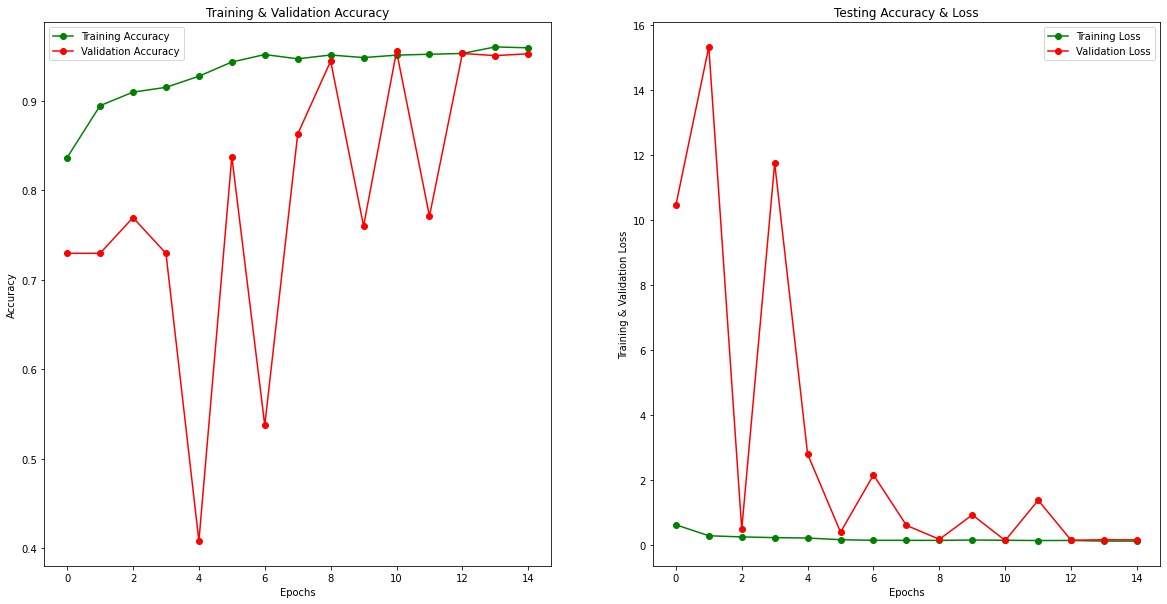

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

An accuracy of 95% for the model trained on the Chest X-Ray Images dataset indicates that the model is performing well in distinguishing between normal and pneumonia cases based on the chest X-ray images.

Here's a breakdown of what this accuracy implies:

High Accuracy: An accuracy of 95% suggests that the model is making correct predictions for the majority of the images in the test set. This level of accuracy is considered high and indicates that the model is effective in its task.

Effective Discrimination: The model can effectively discriminate between normal and pneumonia cases in chest X-ray images. This is crucial for medical diagnostics as accurate identification of pneumonia cases can lead to timely treatment and improved patient outcomes.

Potential Clinical Utility: With such high accuracy, the model holds promise for potential clinical utility. It could serve as a valuable tool for radiologists in assisting with the diagnosis of pneumonia, providing a second opinion, or aiding in triage in scenarios where radiologist availability is limited.

Limitations: While a 95% accuracy is impressive, it's essential to recognize that no model is perfect. There may still be cases where the model misclassifies images, leading to false positives or false negatives. Understanding the limitations of the model is crucial for its responsible deployment in clinical settings.

Validation and Further Analysis: It's important to validate the model's performance on independent datasets and conduct further analysis to gain insights into its strengths and weaknesses. This may include analyzing misclassified images, evaluating performance across different patient demographics, and assessing the model's robustness to variations in imaging conditions.